<a href="https://colab.research.google.com/github/ChristianTrummer99/thermodynamics/blob/master/codingassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the proper libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
#Initialize variables
#Create r, r_c, and k arrays

r = np.arange(12,24+0.5,0.5) 
r_c = np.arange(1,4+0.5,0.5)
k = [1.401, 1.4, 1.398, 1.395, 1.391, 1.387, 1.381, 1.376, 1.37, 1.364, 1.359, 1.354, 1.344, 1.336]

# the below for loop generates the n_diesel values for every possible combination of k, r, and r_c 
n_diesel= [] 

for i in k:
  for j in r:
    for h in r_c:
      #account for the 1 - 1 = 0 in denominator possibility
      if h == 1:
        n_Diesel = 1 - (1/(j ** (i-1)))
      else:
        n_Diesel = 1 - (1/(j ** (i-1)))*((h ** (i) - 1)/(i*(h - 1)))
      n_diesel.append(n_Diesel)
      #uncomment following line to understand loop logic
      #print('where k =',i,', r is',j,'and r_c is,',h,', n_diesel = ', n_Diesel)
print(n_diesel)


[0.6308113675710978, 0.5969050586237471, 0.5676077277833511, 0.5414689288251092, 0.5176759800462721, 0.49571656540281883, 0.4752421542522911, 0.6368056492097662, 0.6034498554931282, 0.5746282068295188, 0.5489138069694327, 0.5255071692074231, 0.5039042956501001, 0.48376231452596485, 0.6424731062275829, 0.6096378121463961, 0.5812659101669742, 0.5559527700060793, 0.5329113805282437, 0.5116456084623978, 0.49181793237088856, 0.6478431351465126, 0.6155010248840787, 0.5875552668864619, 0.5626223283189593, 0.5399270188982705, 0.5189806572403299, 0.4994507914558528, 0.6529415221518244, 0.6210676480964425, 0.5935264776666072, 0.5689545082656426, 0.546587772506808, 0.5259446639407241, 0.5066975437843139, 0.657790996906178, 0.6263624989399019, 0.5992061633987946, 0.5749775400126389, 0.5529233363696374, 0.5325686755443012, 0.5135904968754212, 0.6624116856129991, 0.6314075520097651, 0.6046178958132074, 0.5807164202386231, 0.5589600042306337, 0.5388801829055927, 0.5201582577398601, 0.6668214843447258

In [0]:
#function to calculate thermal diesel efficiency

def nDiesel(r, r_c, k):
  if r_c == 1:
    n_diesel = 1 - (1/(r ** (k-1)))
  else:
    n_diesel = 1 - (1/(r ** (k-1)))*((r_c ** (k) - 1)/(k*(r_c - 1)))
  value = '%.3f' % n_diesel
  return value

#adjust r and r_c arrays 

r = np.arange(12,24+2,2) 
r_c = np.arange(1,4+0.5,0.5)


In [0]:
#create data table for k = 1.391

k = 1.391

d1 = []
for i in r:
  dataRow =[]
  for j in r_c:
    dataRow.append(nDiesel(i,j,k))
#   print(dataRow)
#   print('\n')
  d1.append(dataRow)
# print(d1)
  
table = pd.DataFrame(d1, columns=r_c, index=r)
table

,1.0,1.5,2.0,2.5,3.0,3.5,4.0
12,0.622,0.588,0.559,0.533,0.509,0.487,0.467
14,0.644,0.612,0.584,0.560,0.538,0.517,0.498
16,0.662,0.632,0.605,0.582,0.561,0.542,0.524
18,0.677,0.648,0.623,0.601,0.581,0.562,0.545
20,0.690,0.662,0.638,0.617,0.598,0.580,0.563
22,0.701,0.675,0.652,0.631,0.613,0.595,0.579
24,0.711,0.686,0.663,0.644,0.625,0.609,0.593


In [0]:
#create data array for k = 1.400

k = 1.4

d2 = []
for i in r:
  dataRow =[]
  for j in r_c:
    dataRow.append(nDiesel(i,j,k))
#   print(dataRow)
#   print('\n')
  d2.append(dataRow)
# print(d2)
  
table = pd.DataFrame(d2, columns=r_c, index=r)
table

,1.0,1.5,2.0,2.5,3.0,3.5,4.0
12,0.630,0.596,0.567,0.541,0.517,0.495,0.474
14,0.652,0.620,0.593,0.568,0.546,0.525,0.506
16,0.670,0.640,0.614,0.591,0.569,0.550,0.532
18,0.685,0.656,0.632,0.609,0.589,0.570,0.553
20,0.698,0.671,0.647,0.625,0.606,0.588,0.572
22,0.710,0.683,0.660,0.639,0.621,0.604,0.588
24,0.720,0.694,0.672,0.652,0.634,0.617,0.602


Text(0.5, 0.92, 'Diesel Cycle Efficiency')

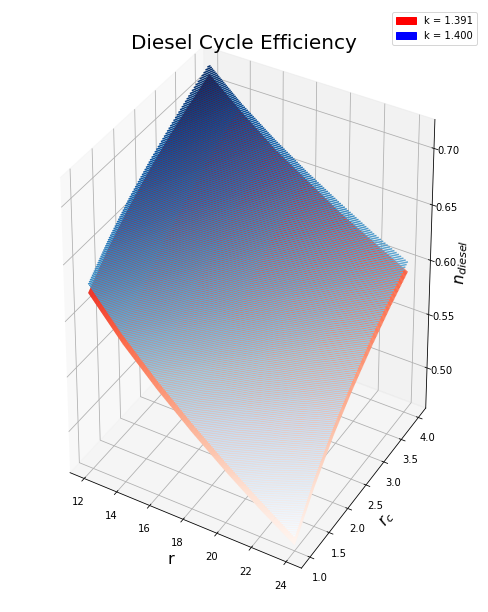

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure()
ax = plt.axes(projection='3d')



fig.set_size_inches(8.5, 11)

k1 = ax.contour3D(r, r_c, d1, 500, cmap = 'Reds');
k2 = ax.contour3D(r, r_c, d2, 300, cmap = 'Blues')

plt.xlabel('r', fontsize=16)
plt.ylabel('$r_{c}$', fontsize=16)
ax.set_zlabel('$n_{diesel}$', fontsize=16)

blue_patch = mpatches.Patch(color='blue', label='k = 1.400')
red_patch = mpatches.Patch(color='red', label='k = 1.391')
plt.legend(handles=[red_patch, blue_patch])
plt.title('Diesel Cycle Efficiency', fontsize=20)

